Object Detection

Библиотека ImageAI предоставляет очень удобные и мощные методы для обнаружения объектов на изображениях. Чтобы приступить к обнаружению объектов, необходимо загрузить уже обученные модели обнаружения объектов. Воспользуемся моделью YOLO. 

Установим библиотеки конкретных версий, чтобы все заработало :)

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
!pip install -q tensorflow==2.3.1
!pip install -q tensorflow-gpu==2.3.1
!git clone https://github.com/dvolchek/YOLOv3-TensorFlow-2.x.git
%cd YOLOv3-TensorFlow-2.x
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0)
ERROR: No matching distribution found for tensorflow==2.3.1
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.3.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.3.1
Cloning into 'YOLOv3-TensorFlow-2.x'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 81 (d

Не забудьте подгрузить файл изображения в сессионное хранилище. Теперь можно выполнять распознование. Выполняем распознавание объектов для изображения с именем 37.jpg. Изображение с распознанными объектами будет сохранено в файле detected.jpg

**NB: Для детектирования людей на последующих изображениях достаточно изменять имена файлов в следующем блоке и запускать его. Весь код сначала выполнять не нужно**



In [20]:
import detection_demo
detection_demo.detect('/content/10.jpg')

1/1 [==============================] - 3s 3s/step


Изображение можно посмотреть в папке проекта, либо вывести на экран в блокноте.

Видно, что на изображении 5 людей. Модель успешно справилась с их обнаружением. Остальные объекты типа laptop, cup и т.п. нас не интересуют)

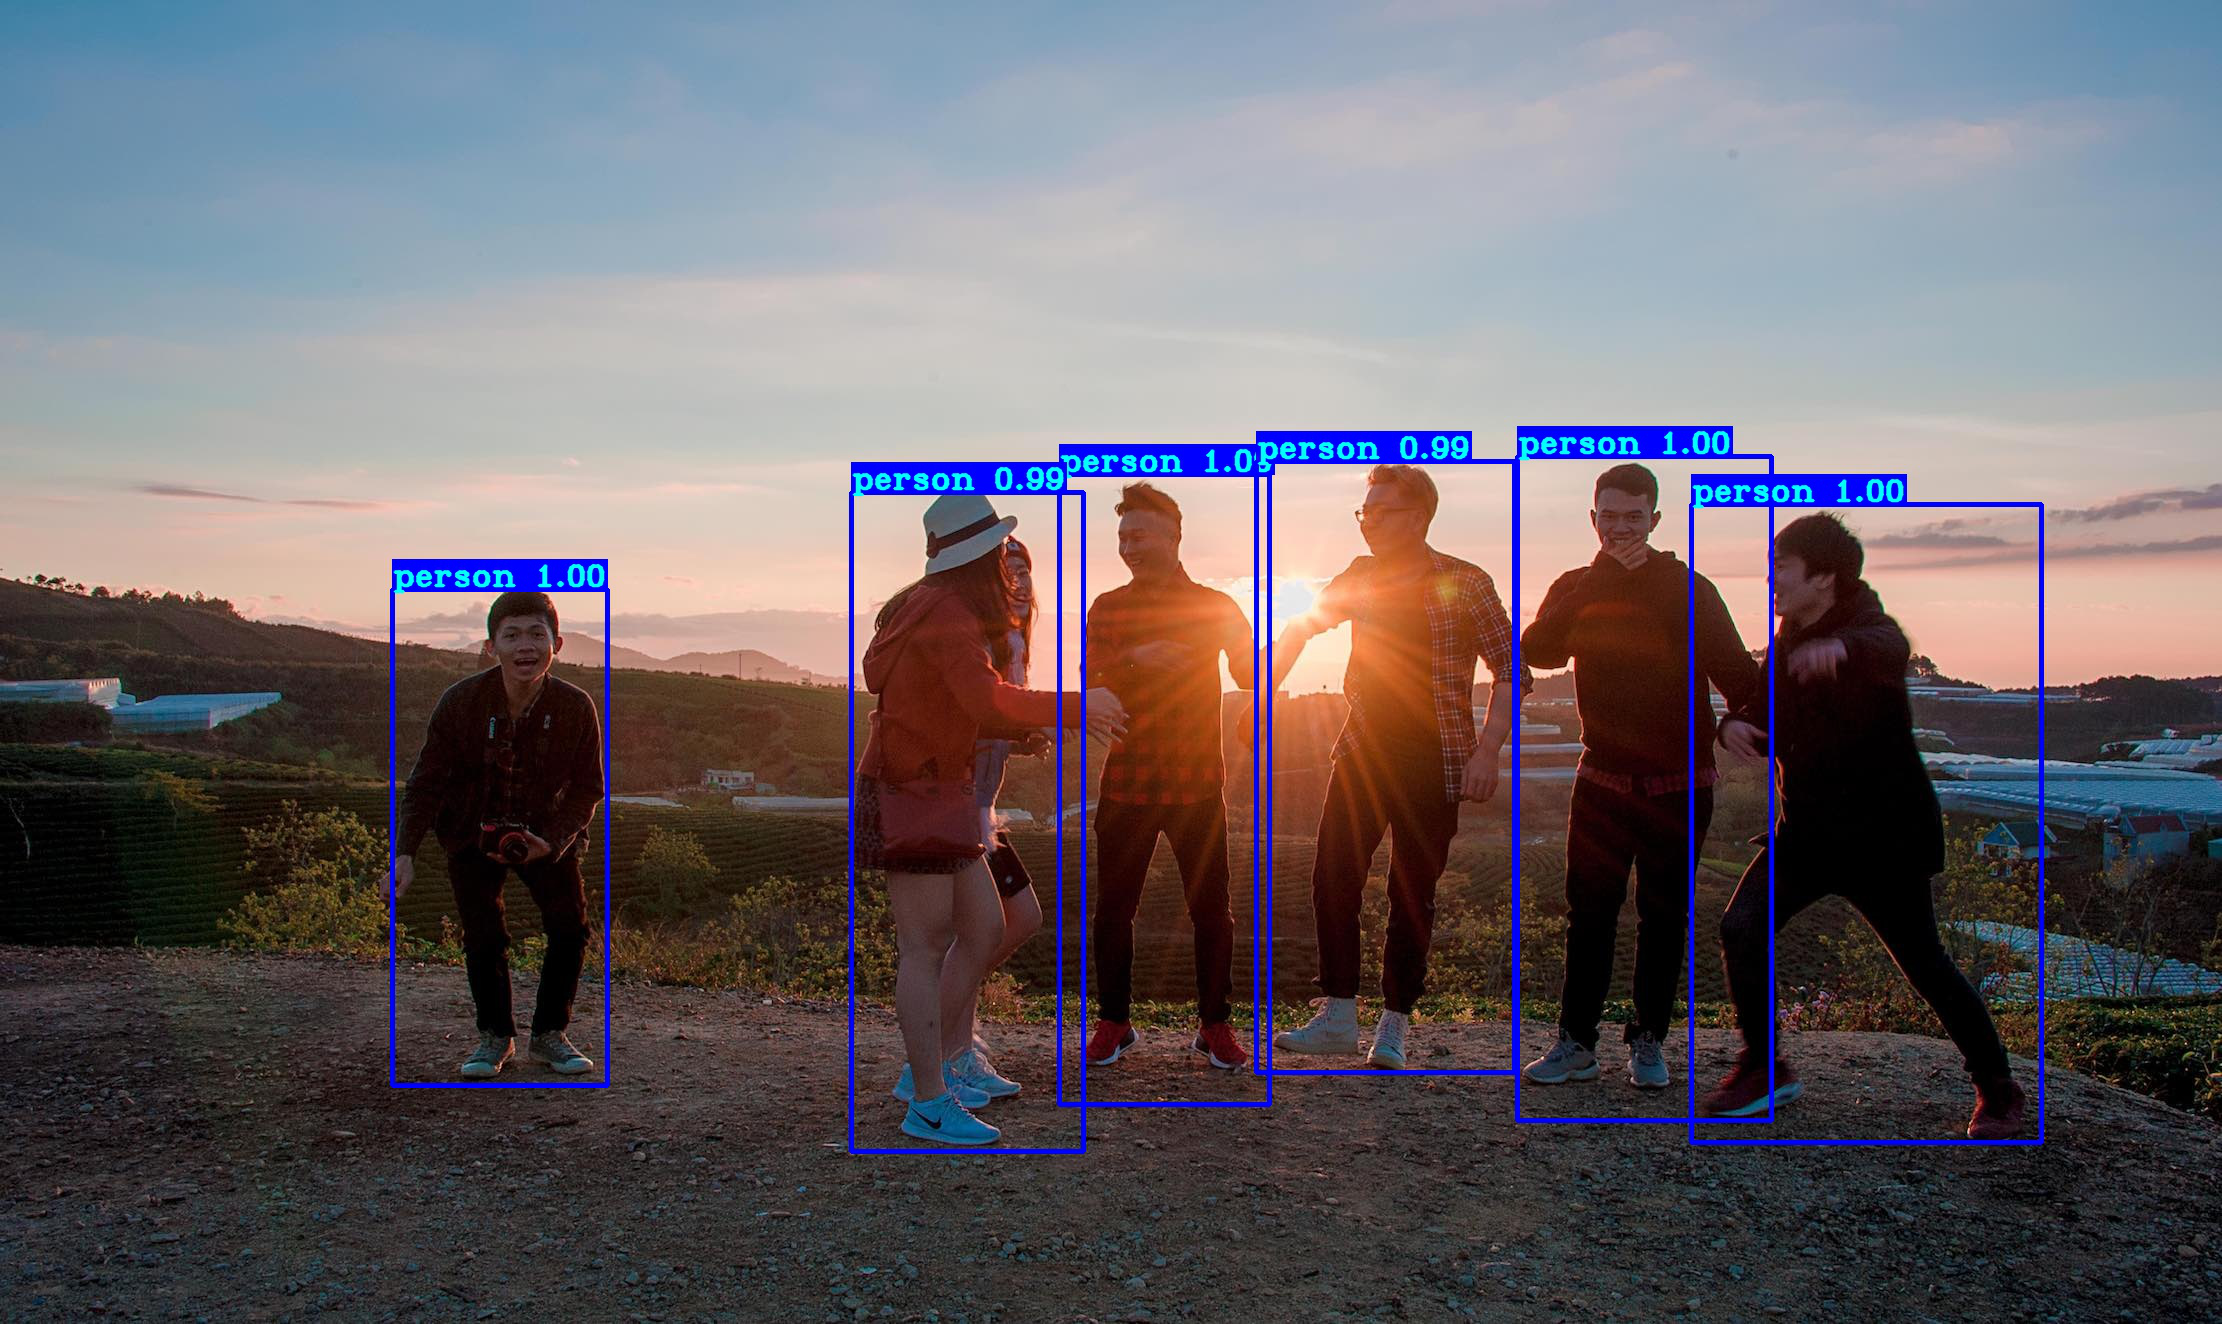

In [21]:
from PIL import Image
image = Image.open('/content/detected.jpg')
image

In [22]:
tp = 3 + 4 + 3 + 6 + 5 + 5 + 3 + 3 + 4 + 6
fp = 0
fn = 1 + 2 + 1 + 1 + 1 + 1
tp, fp, fn

(42, 0, 7)

In [25]:
acc = tp / (tp + fn)
presicion = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2*presicion*recall/(presicion+recall)
round(f1, 3)

0.923